# Data analysis

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import zipfile
import pickle

# Plot settings

In [12]:
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['figure.figsize'] = (8,6)

# HW2

## Prepare data

In [6]:
cwd = os.getcwd()+'/hw2'
print(cwd)

/Users/nicola/Aalto_workspace/DRL_Levine/cs285_f2021/homework_fall2021/hw2


In [7]:
experiments_dirs = os.listdir(cwd+'/data')
experiments_dirs.sort()
experiments_dirs.pop(0) # there is a .DS_Store hidden directory to be filtered
print(experiments_dirs)
training_logs = []
for exp_id in experiments_dirs:
    path = '%s/data/%s'%(cwd,exp_id)
    # unzipping
    with zipfile.ZipFile("%s/training_log.zip"%path,"r") as zip_ref:
        zip_ref.extractall("%s/data/%s"%(cwd,exp_id))
    path = path+'/archive/data.pkl'
    print('Loading %s ...'%path)
    # load : get the data from file
    training_log = pickle.load(open(path, "rb"))
    training_logs.append(training_log)

['q1_lb_no_rtg_dsa_seed_1_CartPole-v0', 'q1_lb_no_rtg_dsa_seed_2_CartPole-v0', 'q1_lb_no_rtg_dsa_seed_3_CartPole-v0', 'q1_lb_no_rtg_dsa_seed_4_CartPole-v0', 'q1_lb_no_rtg_dsa_seed_5_CartPole-v0', 'q1_lb_rtg_dsa_seed_1_CartPole-v0', 'q1_lb_rtg_dsa_seed_2_CartPole-v0', 'q1_lb_rtg_dsa_seed_3_CartPole-v0', 'q1_lb_rtg_dsa_seed_4_CartPole-v0', 'q1_lb_rtg_dsa_seed_5_CartPole-v0', 'q1_lb_rtg_na_seed_1_CartPole-v0', 'q1_lb_rtg_na_seed_2_CartPole-v0', 'q1_lb_rtg_na_seed_3_CartPole-v0', 'q1_lb_rtg_na_seed_4_CartPole-v0', 'q1_lb_rtg_na_seed_5_CartPole-v0', 'q1_sb_no_rtg_dsa_seed_1_CartPole-v0', 'q1_sb_no_rtg_dsa_seed_2_CartPole-v0', 'q1_sb_no_rtg_dsa_seed_3_CartPole-v0', 'q1_sb_no_rtg_dsa_seed_4_CartPole-v0', 'q1_sb_no_rtg_dsa_seed_5_CartPole-v0', 'q1_sb_rtg_dsa_seed_1_CartPole-v0', 'q1_sb_rtg_dsa_seed_2_CartPole-v0', 'q1_sb_rtg_dsa_seed_3_CartPole-v0', 'q1_sb_rtg_dsa_seed_4_CartPole-v0', 'q1_sb_rtg_dsa_seed_5_CartPole-v0', 'q1_sb_rtg_na_seed_1_CartPole-v0', 'q1_sb_rtg_na_seed_2_CartPole-v0', 'q1_

## Q1

In [8]:
# First filtering - only q1
q1_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q1' in name:
        q1_logs[name] = training_log

```python
python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 1000 \
-dsa --exp_name q1_sb_no_rtg_dsa
python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 1000 \
-rtg -dsa --exp_name q1_sb_rtg_dsa
python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 1000 \
-rtg --exp_name q1_sb_rtg_na
python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 5000 \
-dsa --exp_name q1_lb_no_rtg_dsa
python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 5000 \
-rtg -dsa --exp_name q1_lb_rtg_dsa
python cs285/scripts/run_hw2.py --env_name CartPole-v0 -n 100 -b 5000 \
-rtg --exp_name q1_lb_rtg_na
```

Since experiments are done in a single environment (and not multiple copies in parallel), batches without usage of a replay buffer (CHECK THIS) consist of b consecutive timesteps. Only if the batch size is larger than the maximum amount of steps per episode (which should be 200) or the agent fails the episode before the end, then there are transitions collected from multiple episodes in the batch.

In [38]:
# Parameters recap

# number of iterations (?!?): n=100 (fixed?)
# batch size (b):
# - sb = small -> 1000
# - lb = large -> 5000


# dsa: disable standardized advantages (subtract mean and divide by std dev) -> if not present, standardized advantages are used

# real: I probably screwed up the previous experiment with the same name 

# rtg: Flag: if present, sets reward_to_go=True. Otherwise, reward_to_go=False by default.

# ba: use value baseline

# gae: use generalized advantage estimation

# na: na = normalized advantages?

My naming convention -> now should be the same:

- q1_sb_no_rtg_dsa -> q1_sb_dsa (if rtg is used, I write it, otherwise omit it)
- q1_sb_rtg_dsa -> SAME (problem: it's identical to the first, redo both)
- q1_sb_rtg_na -> q1_sb_rtg
- q1_lb_no_rtg_dsa -> q1_lb_dsa
- q1_lb_rtg_dsa -> SAME
- q1_lb_rtg_na -> q1_lb_rtg (missing at the moment)

In [9]:
sb_labels = ['q1_sb_no_rtg_dsa', 'q1_sb_rtg_dsa', 'q1_sb_rtg_na']
lb_labels = ['q1_lb_no_rtg_dsa', 'q1_lb_rtg_dsa', 'q1_lb_rtg_na']

Create two graphs:
- In the first graph, compare the learning curves (average return at each iteration) for the experiments prefixed with q1_sb. (The small batch experiments.)
- In the second graph, compare the learning curves for the experiments prefixed with q1_lb. (The large batch experiments.) 

Answer the following questions briefly:
- Which value estimator has better performance without advantage-standardization: the trajectory-centric one, or the one using reward-to-go? 
- Did advantage standardization help? 
- Did the batch size make an impact? 

In [52]:
def compute_CI(data, metric=np.mean, confidence_level=0.95, axis=-1, n_resamples=999, **kwargs):
    """
    data: np.array of shape (timesteps, sample_size) (second dim. is the number of runs for ex.)
    
    Returns:
    --------
    ci_l : np.array of shape (timesteps,)
    ci_u: np.array of shape (timesteps,)
    """
    from scipy.stats import bootstrap
    res = bootstrap((data,), metric, confidence_level=confidence_level, axis=axis, n_resamples=n_resamples, **kwargs)
    ci_l, ci_u = res.confidence_interval
    return ci_l, ci_u


def plot_mean_with_CI(data, plot_dict={}, confidence_level=0.95, axis=-1, n_resamples=999, **kwargs):
    ci_l, ci_u = compute_CI(data, metric=np.mean, confidence_level=0.95, axis=-1, n_resamples=999, **kwargs)
    mean_value = np.mean(data, axis=-1)
    x_axis = np.arange(len(mean_value))
    plt.plot(x_axis, mean_value, **plot_dict)
    if 'color' in plot_dict.keys():
        plt.fill_between(x_axis, ci_l, ci_u, color=plot_dict['color'], alpha=.1)
    else:
        plt.fill_between(x_axis, ci_l, ci_u, alpha=.1)

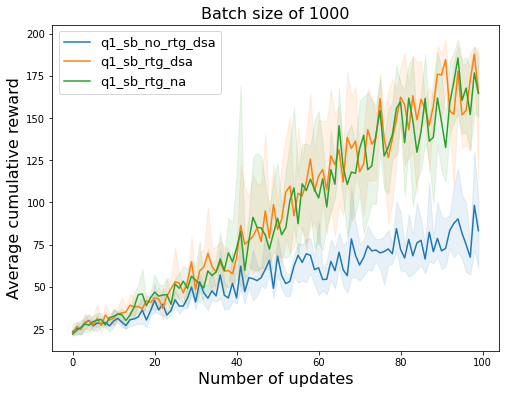

In [53]:
key = 'Eval_AverageReturn'

for i,exp_name in enumerate(sb_labels):
    data = []
    for k in q1_logs.keys():
        if exp_name in k:
            data.append(q1_logs[k][key])
    data = np.array(data).T # (n_steps, n_runs)
    
    plot_mean_with_CI(data, dict(label=exp_name, color='C%d'%i))
plt.xlabel('Number of updates')
plt.ylabel('Average cumulative reward')
plt.title('Batch size of 1000')
plt.legend()
plt.show()

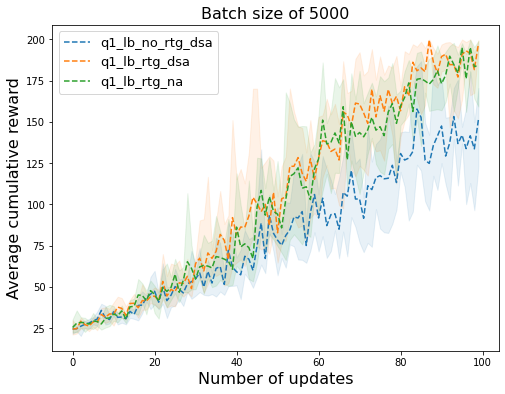

In [55]:
key = 'Eval_AverageReturn'

for i,exp_name in enumerate(lb_labels):
    data = []
    for k in q1_logs.keys():
        if exp_name in k:
            data.append(q1_logs[k][key])
    data = np.array(data).T # (n_steps, n_runs)
    
    plot_mean_with_CI(data, dict(label=exp_name, color='C%d'%i, linestyle='dashed'))
plt.xlabel('Number of updates')
plt.ylabel('Average cumulative reward')
plt.title('Batch size of 5000')
plt.legend()
plt.show()

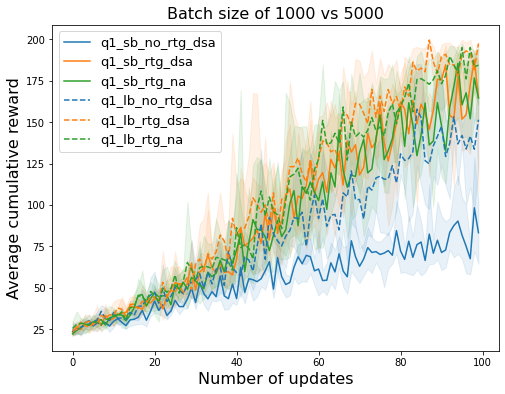

In [57]:
key = 'Eval_AverageReturn'

for i,exp_name in enumerate(sb_labels):
    data = []
    for k in q1_logs.keys():
        if exp_name in k:
            data.append(q1_logs[k][key])
    data = np.array(data).T # (n_steps, n_runs)
    
    plot_mean_with_CI(data, dict(label=exp_name, color='C%d'%i))
    
for i,exp_name in enumerate(lb_labels):
    data = []
    for k in q1_logs.keys():
        if exp_name in k:
            data.append(q1_logs[k][key])
    data = np.array(data).T # (n_steps, n_runs)
    
    plot_mean_with_CI(data, dict(label=exp_name, color='C%d'%i, linestyle='dashed'))
    
plt.xlabel('Number of updates')
plt.ylabel('Average cumulative reward')
plt.title('Batch size of 1000 vs 5000')
plt.legend()
plt.show()

It's not clear to see much, except that the run whih is clearly worse is the one with small batch, no reward to go and disables standardization of the advantages. Except for this case, increasing the batch size does not significantly increases performance nor speed of learning (learning rate was too low to be optimal though).

## Q2

Your task is to find the smallest batch size b* and largest learning rate r* that gets to optimum (maximum score of 1000) in less than 100 iterations. 
The policy performance may fluctuate around 1000; this is fine. The precision of b* and r* need only be one significant digit.

Deliverables:
- Given the b* and r* you found, provide a learning curve where the policy gets to optimum (maximum
score of 1000) in less than 100 iterations. (This may be for a single random seed, or averaged over multiple seeds).

In [54]:
# First filtering - only q2
q2_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q2' in name:
        q2_logs[name] = training_log

In [68]:
# Batch sizes tried: 500 (all below), 1000 (5e-2), 3000 (5e-2), 5000 (1e-2)
# Learning rates tried: 5e-2, 1e-2, 5e-3, 1e-3

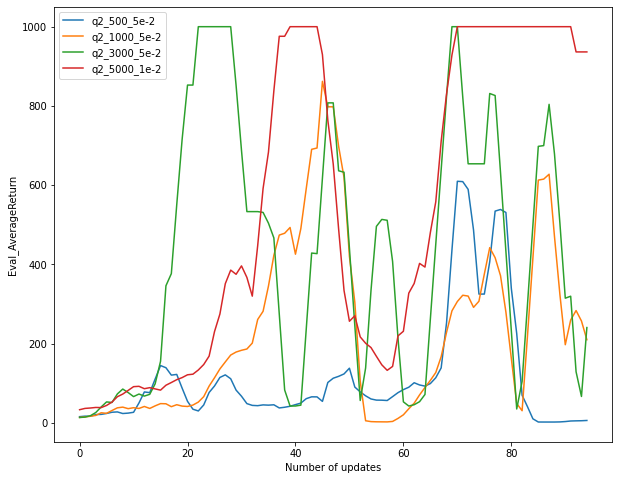

In [71]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Eval_AverageReturn'
window = 5
labels = ['q2_500_5e-2','q2_1000_5e-2', 'q2_3000_5e-2','q2_5000_1e-2']
plt.figure(figsize=(10,8))
for l in labels:
    # moving window average
    x = q2_logs[l+'_InvertedPendulum-v2'][key]
    y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
    plt.plot(y, label=l)
plt.xlabel('Number of updates')
plt.ylabel(key)
plt.legend()
plt.show()

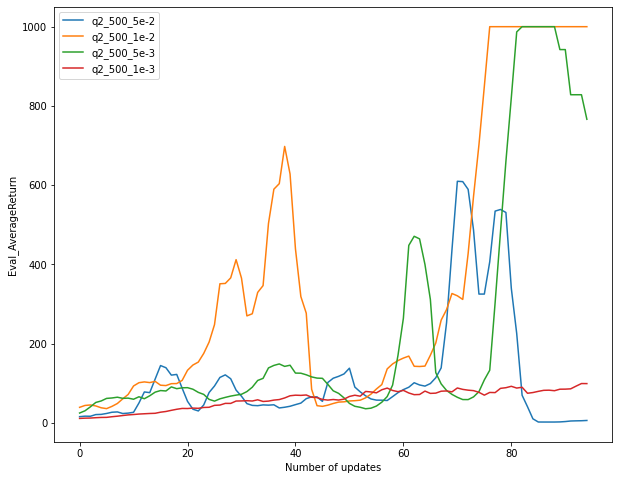

In [72]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Eval_AverageReturn'
window = 5
labels = ['q2_500_5e-2', 'q2_500_1e-2', 'q2_500_5e-3', 'q2_500_1e-3']
plt.figure(figsize=(10,8))
for l in labels:
    # moving window average
    x = q2_logs[l+'_InvertedPendulum-v2'][key]
    y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
    plt.plot(y, label=l)
plt.xlabel('Number of updates')
plt.ylabel(key)
plt.legend()
plt.show()

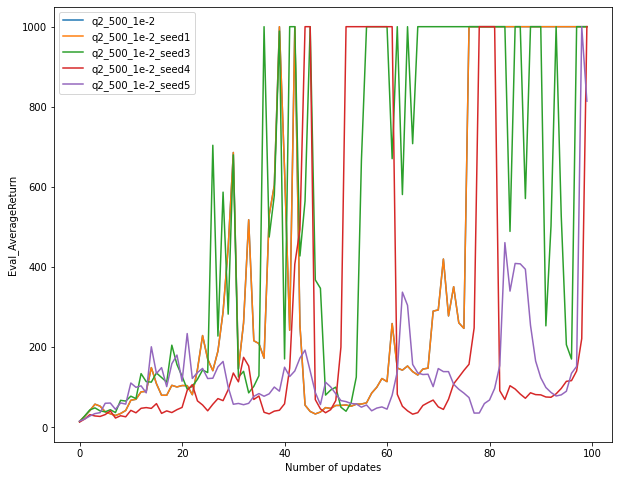

In [74]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Eval_AverageReturn'
window = 0
labels = ['q2_500_1e-2', 'q2_500_1e-2_seed1', 'q2_500_1e-2_seed3', 'q2_500_1e-2_seed4', 'q2_500_1e-2_seed5']
plt.figure(figsize=(10,8))
for l in labels:
    # moving window average
    x = q2_logs[l+'_InvertedPendulum-v2'][key]
    if window > 0:
        y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
    else:
        y = x
    plt.plot(y, label=l)
plt.xlabel('Number of updates')
plt.ylabel(key)
plt.legend()
plt.show()

## Q3

In [75]:
# First filtering - only q2
q3_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q3' in name:
        q3_logs[name] = training_log

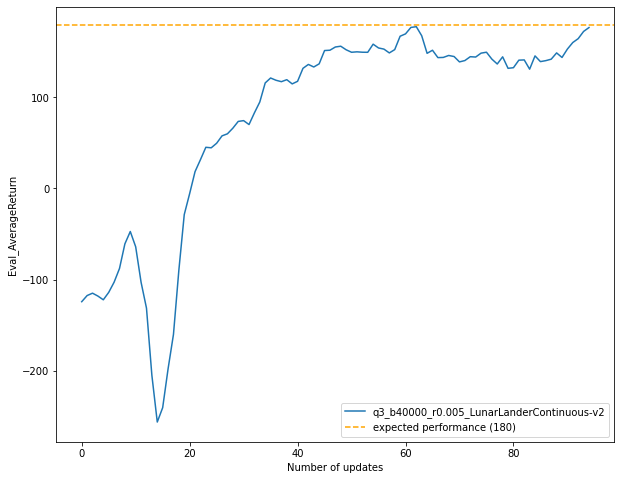

In [82]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Eval_AverageReturn'
window = 5
#labels = ['q2_500_5e-2','q2_1000_5e-2', 'q2_3000_5e-2','q2_5000_1e-2']
plt.figure(figsize=(10,8))
for l in q3_logs.keys():
    # moving window average
    x = q3_logs[l][key]
    y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
    plt.plot(y, label=l)
plt.axhline(180, color = 'orange', linestyle='dashed', label='expected performance (180)')
plt.xlabel('Number of updates')
plt.ylabel(key)
plt.legend()
plt.show()

# HW3

In [42]:
cwd = os.getcwd()+'/hw3'
print(cwd)

/Users/nicola/Aalto_workspace/DRL_Levine/cs285_f2021/homework_fall2021/hw3


In [43]:
experiments_dirs = os.listdir(cwd+'/data')
experiments_dirs.sort()
experiments_dirs.pop(0) # there is a .DS_Store hidden directory to be filtered
print(experiments_dirs)
training_logs = []
for exp_id in experiments_dirs:
    path = '%s/data/%s'%(cwd,exp_id)
    # unzipping
    with zipfile.ZipFile("%s/training_log.zip"%path,"r") as zip_ref:
        zip_ref.extractall("%s/data/%s"%(cwd,exp_id))
    path = path+'/archive/data.pkl'
    print('Loading %s ...'%path)
    # load : get the data from file
    training_log = pickle.load(open(path, "rb"))
    training_logs.append(training_log)

['q1_dqn_MsPacman-v0', 'q2_doubledqn_seed1_LunarLander-v3', 'q2_doubledqn_seed2_LunarLander-v3', 'q2_dqn_seed1_LunarLander-v3', 'q4_100_1_seed_1_CartPole-v0', 'q4_10_10_seed_1_CartPole-v0', 'q4_1_100_seed_1_CartPole-v0', 'q4_ac_1_1_seed_1_CartPole-v0', 'q4_ac_CartPole-v0', 'q5_10_10_seed_1_InvertedPendulum-v2']
Loading /Users/nicola/Aalto_workspace/DRL_Levine/cs285_f2021/homework_fall2021/hw3/data/q1_dqn_MsPacman-v0/archive/data.pkl ...
Loading /Users/nicola/Aalto_workspace/DRL_Levine/cs285_f2021/homework_fall2021/hw3/data/q2_doubledqn_seed1_LunarLander-v3/archive/data.pkl ...
Loading /Users/nicola/Aalto_workspace/DRL_Levine/cs285_f2021/homework_fall2021/hw3/data/q2_doubledqn_seed2_LunarLander-v3/archive/data.pkl ...
Loading /Users/nicola/Aalto_workspace/DRL_Levine/cs285_f2021/homework_fall2021/hw3/data/q2_dqn_seed1_LunarLander-v3/archive/data.pkl ...
Loading /Users/nicola/Aalto_workspace/DRL_Levine/cs285_f2021/homework_fall2021/hw3/data/q4_100_1_seed_1_CartPole-v0/archive/data.pkl ...

## Q1

In [35]:
# First filtering - only q2
q1_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q1' in name:
        q1_logs[name] = training_log

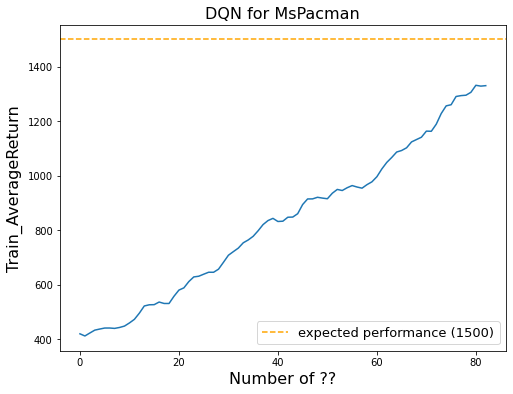

In [37]:
#q3_dqn_MsPacman-v0_08-11-2021_15-49-38
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Train_AverageReturn'
window = 5
#labels = ['q4_ac_1_1','q4_1_100', 'q4_100_1','q4_10_10']

x = q1_logs['q1_dqn_MsPacman-v0'][key]
y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
plt.plot(y)
plt.axhline(1500, color = 'orange', linestyle='dashed', label='expected performance (1500)')
plt.xlabel('Number of ??')
plt.title("DQN for MsPacman")
plt.ylabel(key)
plt.legend()
plt.show()

## Q2

Status: 3 runs missing (seed_3 of double dqn and seed 2 and 3 of dqn)

In [45]:
# First filtering - only q2
q2_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q2' in name:
        q2_logs[name] = training_log

In [46]:
key = 'Train_AverageReturn'
for k in q2_logs.keys():
    print(k, q2_logs[k].keys(), len(q2_logs[k][key]))

q2_doubledqn_seed1_LunarLander-v3 dict_keys(['Eval_AverageReturn', 'Eval_MinReturn', 'Train_AverageReturn', 'Train_MinReturn', 'Actor_Loss', 'Critic_Loss']) 49
q2_doubledqn_seed2_LunarLander-v3 dict_keys(['Eval_AverageReturn', 'Eval_MinReturn', 'Train_AverageReturn', 'Train_MinReturn', 'Actor_Loss', 'Critic_Loss']) 49
q2_dqn_seed1_LunarLander-v3 dict_keys(['Eval_AverageReturn', 'Eval_MinReturn', 'Train_AverageReturn', 'Train_MinReturn', 'Actor_Loss', 'Critic_Loss']) 49


In [47]:
labels = ['q2_doubledqn_seed1_LunarLander-v3','q2_doubledqn_seed2_LunarLander-v3','q2_dqn_seed1_LunarLander-v3']

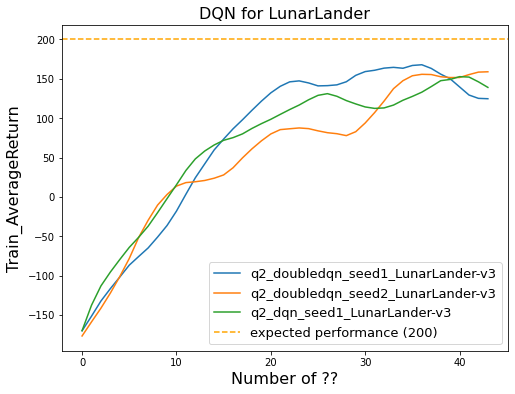

In [48]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Train_AverageReturn'
window = 5
#labels = ['q4_ac_1_1','q4_1_100', 'q4_100_1','q4_10_10']

for l in labels:
    x = q2_logs[l][key]
    y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
    plt.plot(y, label=l)
plt.axhline(200, color = 'orange', linestyle='dashed', label='expected performance (200)')
plt.xlabel('Number of ??')
plt.title("DQN for LunarLander")
plt.ylabel(key)
plt.legend()
plt.show()

## Q3

Status: this is supposed to be 3 runs of LunarLander with different HPs... Rename current run as q1 and as such is good. **REDO** with LunarLander changing learning rates

In [20]:
# First filtering - only q2
q3_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q3' in name:
        q3_logs[name] = training_log

In [24]:
key = 'Train_AverageReturn'
for k in q3_logs.keys():
    print(k, len(q3_logs[k][key]))

q3_dqn_MsPacman-v0_08-11-2021_15-32-43 0
q3_dqn_MsPacman-v0_08-11-2021_15-38-52 0
q3_dqn_MsPacman-v0_08-11-2021_15-41-13 0
q3_dqn_MsPacman-v0_08-11-2021_15-41-47 0
q3_dqn_MsPacman-v0_08-11-2021_15-42-12 0
q3_dqn_MsPacman-v0_08-11-2021_15-49-38 88
q3_dqn_test_MsPacman-v0_08-11-2021_14-31-59 0
q3_dqn_test_MsPacman-v0_08-11-2021_14-32-39 0
q3_dqn_test_MsPacman-v0_08-11-2021_14-34-04 0
q3_dqn_test_MsPacman-v0_08-11-2021_14-40-51 0
q3_dqn_test_MsPacman-v0_08-11-2021_14-47-40 0
q3_dqn_test_MsPacman-v0_08-11-2021_14-49-33 0
q3_dqn_test_MsPacman-v0_08-11-2021_14-50-13 5
q3_dqn_test_MsPacman-v0_08-11-2021_15-20-53 0
q3_dqn_test_MsPacman-v0_08-11-2021_15-22-21 3
q3_dqn_test_MsPacman-v0_08-11-2021_15-31-20 0
q3_dqn_test_MsPacman-v0_08-11-2021_15-32-33 0


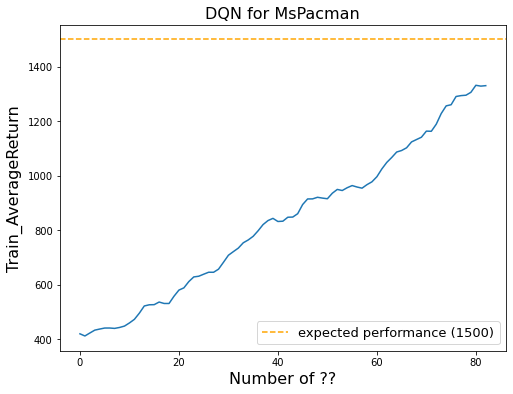

In [32]:
#q3_dqn_MsPacman-v0_08-11-2021_15-49-38
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Train_AverageReturn'
window = 5
#labels = ['q4_ac_1_1','q4_1_100', 'q4_100_1','q4_10_10']

x = q3_logs['q3_dqn_MsPacman-v0_08-11-2021_15-49-38'][key]
y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
plt.plot(y)
plt.axhline(1500, color = 'orange', linestyle='dashed', label='expected performance (1500)')
plt.xlabel('Number of ??')
plt.title("DQN for MsPacman")
plt.ylabel(key)
plt.legend()
plt.show()

## Q4 

Status: OK

In [49]:
# First filtering - only q2
q4_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q4' in name:
        q4_logs[name] = training_log

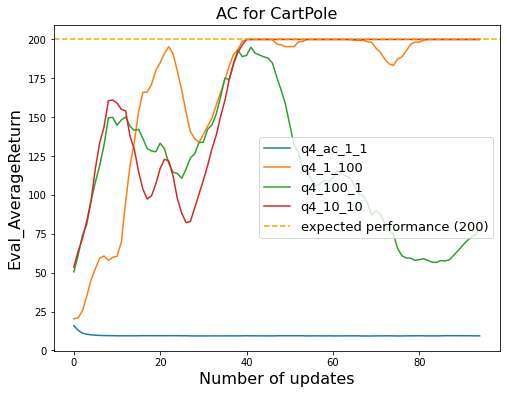

In [50]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Eval_AverageReturn'
window = 5
labels = ['q4_ac_1_1','q4_1_100', 'q4_100_1','q4_10_10']

for l in labels:
    
    x = q4_logs[l+'_seed_1_CartPole-v0'][key][:100]
    y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
    plt.plot(y, label=l)
plt.axhline(200, color = 'orange', linestyle='dashed', label='expected performance (200)')
plt.xlabel('Number of updates')
plt.title("AC for CartPole")
plt.ylabel(key)
plt.legend()
plt.show()

## Q5

Status: redo both (Cheetah overwrote part of the data of the IP).

In [51]:
# First filtering - only q2
q5_logs = {}

for name, training_log in zip(experiments_dirs, training_logs):
    if 'q5' in name:
        q5_logs[name] = training_log

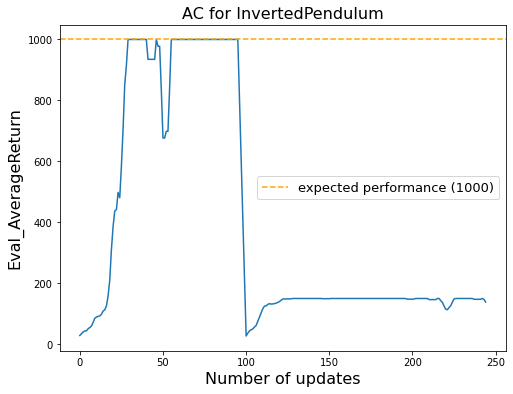

In [52]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Eval_AverageReturn'
window = 5
#labels = ['q2_500_5e-2','q2_1000_5e-2', 'q2_3000_5e-2','q2_5000_1e-2']

x = q5_logs['q5_10_10_seed_1_InvertedPendulum-v2'][key]
y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
plt.plot(y)
plt.axhline(1000, color = 'orange', linestyle='dashed', label='expected performance (1000)')
plt.xlabel('Number of updates')
plt.title("AC for InvertedPendulum")
plt.ylabel(key)
plt.legend()
plt.show()

In [ ]:
# Code to plot a specific key (e.g. Eval_AverageReturn)
key = 'Eval_AverageReturn'
window = 5
#labels = ['q2_500_5e-2','q2_1000_5e-2', 'q2_3000_5e-2','q2_5000_1e-2']

x = q5_logs['q5_10_10_seed_1_HalfCheetah-v2'][key]
y = [np.mean(x[i:i+window]) for i in range(len(x)-window)]
plt.plot(y)
plt.axhline(150, color = 'orange', linestyle='dashed', label='expected performance (150)')
plt.xlabel('Number of updates')
plt.title("AC for HalfCheetah")
plt.ylabel(key)
plt.legend()
plt.show()

# HW4

## Q1

TODO: download and embed figures for the 3 runs.

## Q2

To verify that your MPC is indeed doing reasonable action selection, run the command above and compare Train AverageReturn (which was the execution of random actions) to Eval AverageReturn (which was the execution of MPC using a model that was trained on the randomly collected training data). You can expect Train AverageReturn to be around -160 and Eval AverageReturn to be around -70 to -50.

Logging result:

```python
Eval_AverageReturn : -35.084266662597656
Eval_StdReturn : 18.480329513549805
Eval_MaxReturn : -11.1017427444458
Eval_MinReturn : -72.69416046142578
Eval_AverageEpLen : 34.416666666666664
Train_AverageReturn : -167.09857177734375
Train_StdReturn : 33.23030471801758
Train_MaxReturn : -105.7049331665039
Train_MinReturn : -220.01486206054688
Train_AverageEpLen : 100.0
Train_EnvstepsSoFar : 5000
TimeSinceStart : 19.68922519683838
Training Loss : 0.3318135738372803
Initial_DataCollection_AverageReturn : -167.09857177734375
```

## Q3

# Bootstrap tutorial

Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

Suppose we have sampled data from an unknown distribution.

In [12]:
import numpy as np

rng = np.random.default_rng()

from scipy.stats import norm

dist = norm(loc=2, scale=4)  # our "unknown" distribution

data = dist.rvs(size=100, random_state=rng)

We are interested int the standard deviation of the distribution.

In [13]:
std_true = dist.std()      # the true value of the statistic

print(std_true)

4.0


In [14]:
std_sample = np.std(data)  # the sample statistic

print(std_sample)

3.8732759514953896


We can calculate a 90% confidence interval of the statistic using bootstrap.

In [15]:
from scipy.stats import bootstrap

data = (data,)  # samples must be in a sequence

res = bootstrap(data, np.std, confidence_level=0.9,

                random_state=rng)

print(res.confidence_interval)

ConfidenceInterval(low=3.4519262338669336, high=4.447510326323417)


If we sample from the distribution 1000 times and form a bootstrap confidence interval for each sample, the confidence interval contains the true value of the statistic approximately 900 times.

In [17]:
n_trials = 1000

ci_contains_true_std = 0

for i in range(n_trials):

    data = (dist.rvs(size=100, random_state=rng),)

    ci = bootstrap(data, np.std, confidence_level=0.9, n_resamples=1000,

                  random_state=rng).confidence_interval

    if ci[0] < std_true < ci[1]:

        ci_contains_true_std += 1

print(ci_contains_true_std)

888


Rather than writing a loop, we can also determine the confidence intervals for all 1000 samples at once.

In [18]:
data = (dist.rvs(size=(n_trials, 100), random_state=rng),)

res = bootstrap(data, np.std, axis=-1, confidence_level=0.9,

                n_resamples=1000, random_state=rng)

ci_l, ci_u = res.confidence_interval

Here, ci_l and ci_u contain the confidence interval for each of the n_trials = 1000 samples.

In [19]:
print(ci_l[995:])

print(ci_u[995:])

[3.49992294 4.2088159  3.8410534  3.70125706 3.23663421]
[4.47282659 5.37325782 4.82711298 4.78610246 4.01772621]


And again, approximately 90% contain the true value, std_true = 4.

In [20]:
print(np.sum((ci_l < std_true) & (std_true < ci_u)))

877


bootstrap can also be used to estimate confidence intervals of multi-sample statistics, including those calculated by hypothesis tests. scipy.stats.mood perform’s Mood’s test for equal scale parameters, and it returns two outputs: a statistic, and a p-value. To get a confidence interval for the test statistic, we first wrap scipy.stats.mood in a function that accepts two sample arguments, accepts an axis keyword argument, and returns only the statistic.

In [21]:
from scipy.stats import mood

def my_statistic(sample1, sample2, axis):

    statistic, _ = mood(sample1, sample2, axis=-1)

    return statistic

Here, we use the ‘percentile’ method with the default 95% confidence level.

In [22]:
sample1 = norm.rvs(scale=1, size=100, random_state=rng)

sample2 = norm.rvs(scale=2, size=100, random_state=rng)

data = (sample1, sample2)

res = bootstrap(data, my_statistic, method='basic', random_state=rng)

print(mood(sample1, sample2)[0])  # element 0 is the statistic

print(res.confidence_interval)

-3.867994334773292
ConfidenceInterval(low=-5.800411067990073, high=-2.1169134951931694)


The bootstrap estimate of the standard error is also available.

In [23]:
print(res.standard_error)

0.9352622923888875


Paired-sample statistics work, too. For example, consider the Pearson correlation coefficient.

In [24]:
from scipy.stats import pearsonr

n = 100

x = np.linspace(0, 10, n)

y = x + rng.uniform(size=n)

print(pearsonr(x, y)[0])  # element 0 is the statistic

0.9947544605671057


We wrap pearsonr so that it returns only the statistic.

In [25]:
def my_statistic(x, y):

    return pearsonr(x, y)[0]

We call bootstrap using paired=True. Also, since my_statistic isn’t vectorized to calculate the statistic along a given axis, we pass in vectorized=False.

In [26]:
res = bootstrap((x, y), my_statistic, vectorized=False, paired=True,

                random_state=rng)

print(res.confidence_interval)

ConfidenceInterval(low=0.9930682935225496, high=0.9960210527038276)
